In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import numpy as np
import seaborn as sns
import statistics as st
import re
df=pd.read_csv('unirank.csv')



In [26]:
#cleaning the broad impact values\n",
#Universities that have a broad impact value in 2014 and 2015, their empty cells are replaced with the average(2014,2015)\n",
#Those universities which do not appear in 2014 or 2015 we replace with the mean value of the column\n",

df['broad_impact'].replace('', np.nan, inplace=True)
#replacing all the empty broad_impact with NaN for easier analysis
for index,bi in df.broad_impact.iteritems():
    if pd.isna(bi):
        inst=df.institution[index]
        avg=0
        count=0
        for index1,broad in df.broad_impact.iteritems():
            if (df.institution[index1]==inst) and (not(pd.isna(broad))):
                avg=avg+broad
                count=count+1
        if count!=0:
            newbi=avg/count
            df.broad_impact[index]=newbi

for index,year in df.year.iteritems():
    if(pd.isna(df.broad_impact[index])):
        print(df.world_rank[index])
#We observe from the output that those universities which do not appear in 2014,2015 but they do in 2012,2013 have ranks >50
#Thus, we will have to fill these NaN values with the mean
df.broad_impact=df.broad_impact.fillna(np.mean(df.broad_impact))
df.describe()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,459.590909,40.278182,275.100455,357.116818,178.888182,459.908636,459.797727,413.417273,458.459300,433.346364,47.798395,2014.318182
std,304.320363,51.740870,121.935100,186.779252,64.050885,303.760352,303.331822,264.366549,300.346661,273.996525,7.760806,0.762130
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43.360000,2012.000000
25%,175.750000,6.000000,175.750000,175.750000,175.750000,175.750000,175.750000,161.000000,180.000000,170.750000,44.460000,2014.000000
50%,450.500000,21.000000,355.000000,450.500000,210.000000,450.500000,450.500000,406.000000,447.000000,426.000000,45.100000,2014.000000
75%,725.250000,49.000000,367.000000,478.000000,218.000000,725.000000,725.250000,645.000000,716.000000,714.250000,47.545000,2015.000000
max,1000.000000,229.000000,367.000000,567.000000,218.000000,1000.000000,991.000000,812.000000,1000.000000,871.000000,100.000000,2015.000000


{'USA': 58, 'United Kingdom': 8, 'Japan': 5, 'Switzerland': 4, 'Israel': 4, 'Canada': 3, 'France': 5, 'Sweden': 1, 'South Korea': 1, 'Italy': 1, 'Germany': 3, 'Netherlands': 2, 'Finland': 1, 'Norway': 1, 'Australia': 2, 'Denmark': 1}


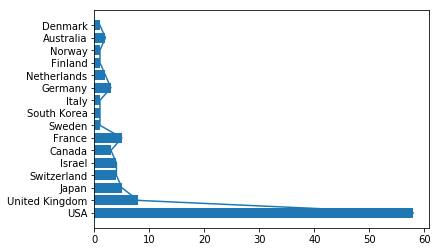

In [31]:
d0={}

for index,year in df.year.iteritems():
    if year==2012:
        x=df.country[index]
        if x not in d0:
            d0[x]=1
        else:
            d0[x]=d0[x]+1
            
print(d0)

country0=[]
value0=[]
for i in d0.keys():
    country0.append(i)
for i in d0.values():
    value0.append(i)
y0=np.arange(len(country0))
plt.plot(d0.values(),d0.keys())
plt.yticks(y0,country0)
plt.barh(y0,value0)
plt.show()

{'USA': 57, 'United Kingdom': 7, 'Japan': 6, 'Switzerland': 4, 'Israel': 4, 'Canada': 4, 'France': 5, 'South Korea': 1, 'Sweden': 1, 'Italy': 1, 'Germany': 2, 'Denmark': 1, 'Norway': 1, 'Netherlands': 1, 'Singapore': 1, 'Russia': 1, 'Australia': 2, 'Finland': 1}


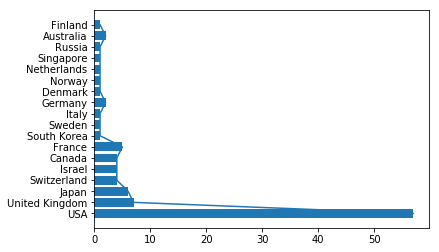

In [32]:
d1={}
for index,year in df.year.iteritems():
    if year==2013:
        x=df.country[index]
        if x not in d1:
            d1[x]=1
        else:
            d1[x]=d1[x]+1
print(d1)
            
country1=[]
value1=[]

for i in d1.keys():
    country1.append(i)
for i in d1.values():
    value1.append(i)
y1=np.arange(len(country1))
plt.plot(d1.values(),d1.keys())
plt.yticks(y1,country1)
plt.barh(y1,value1)
plt.show()

{'USA': 229, 'United Kingdom': 64, 'Japan': 74, 'Switzerland': 9, 'Israel': 7, 'South Korea': 34, 'Canada': 32, 'France': 50, 'Russia': 3, 'China': 84, 'Taiwan': 25, 'Sweden': 11, 'Singapore': 2, 'Denmark': 5, 'Germany': 55, 'Netherlands': 13, 'Italy': 47, 'Belgium': 10, 'Australia': 27, 'Finland': 9, 'Norway': 5, 'South Africa': 5, 'Spain': 41, 'Brazil': 18, 'Hong Kong': 6, 'Ireland': 8, 'Austria': 12, 'New Zealand': 6, 'Portugal': 7, 'Thailand': 3, 'Czech Republic': 5, 'Malaysia': 3, 'India': 15, 'Greece': 7, 'Mexico': 2, 'Hungary': 6, 'Argentina': 4, 'Turkey': 10, 'Poland': 9, 'Saudi Arabia': 4, 'Chile': 4, 'Iceland': 1, 'Slovenia': 2, 'Estonia': 1, 'Lebanon': 1, 'Croatia': 1, 'Colombia': 2, 'Slovak Republic': 1, 'Iran': 8, 'Egypt': 4, 'Serbia': 1, 'Bulgaria': 1, 'Lithuania': 1, 'Uganda': 1, 'United Arab Emirates': 1, 'Uruguay': 1, 'Cyprus': 1, 'Romania': 1, 'Puerto Rico': 1}


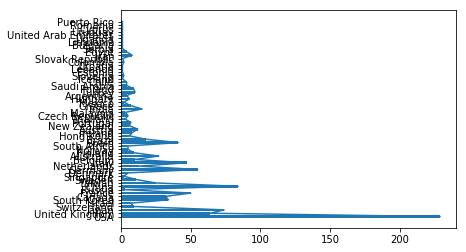

In [43]:
d2={}
for index,year in df.year.iteritems():
    if year==2014:
        x=df.country[index]
        if x not in d2:
            d2[x]=1
        else:
            d2[x]=d2[x]+1
print(d2)
country2=[]
value2=[]

for i in d2.keys():
    country2.append(i)
for i in d2.values():
    value2.append(i)
y2=np.arange(len(country2))
plt.plot(d2.values(),d2.keys())
plt.yticks(y2,country2)
plt.barh(y2,value2)
plt.show()
        

In [18]:
"The following conclusion can be made from the above graphs:\n",
"- Over the years, the country with the most number of universities has not varied a lot.\n",
"- The same applies to the bottom few countries but with some minor variations here and there.\n",
"  The US has the most number of universities alomst approximately 60% of the top 100\n",
"  Followed by the UK and Japan around less than 10% each.\n",
"'''\n"

"'''\n"

In [20]:
"questions:"
"does a higher ranking mean more alumni employment?"
"increase or decrease innumber of universities in top 100 over the years"


'does a higher ranking mean more alumni employment?'

{'USA': 229, 'United Kingdom': 65, 'Japan': 74, 'Switzerland': 9, 'Israel': 7, 'South Korea': 36, 'Canada': 33, 'France': 49, 'China': 83, 'Taiwan': 21, 'Russia': 5, 'Singapore': 2, 'Sweden': 11, 'Denmark': 5, 'Germany': 55, 'Belgium': 10, 'Netherlands': 13, 'Australia': 27, 'Norway': 5, 'Finland': 9, 'Italy': 47, 'Spain': 40, 'Brazil': 18, 'South Africa': 5, 'Hong Kong': 6, 'Ireland': 8, 'Austria': 12, 'Portugal': 7, 'New Zealand': 6, 'Czech Republic': 5, 'Greece': 7, 'Thailand': 3, 'Mexico': 2, 'India': 16, 'Argentina': 3, 'Chile': 4, 'Poland': 9, 'Hungary': 6, 'Iceland': 1, 'Turkey': 10, 'Malaysia': 3, 'Slovenia': 2, 'Estonia': 1, 'Croatia': 1, 'Saudi Arabia': 4, 'Colombia': 2, 'Lebanon': 1, 'Slovak Republic': 1, 'Iran': 8, 'Serbia': 1, 'Lithuania': 1, 'Egypt': 4, 'Bulgaria': 1, 'Uruguay': 1, 'Uganda': 1, 'Cyprus': 1, 'United Arab Emirates': 1, 'Puerto Rico': 1, 'Romania': 2}


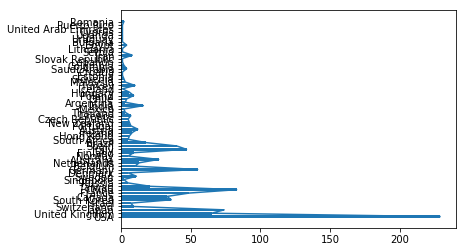

In [44]:
d3={}
for index,year in df.year.iteritems():
    if year==2015:
        x=df.country[index]
        if x not in d3:
            d3[x]=1
        else:
            d3[x]=d3[x]+1
print(d3)

country3=[]
value3=[]
for i in d3.keys():
    country3.append(i)
for i in d3.values():
    value3.append(i)
y3=np.arange(len(country3))
plt.plot(d3.values(),d3.keys())
plt.yticks(y3,country3)
plt.barh(y3,value3)
plt.show()

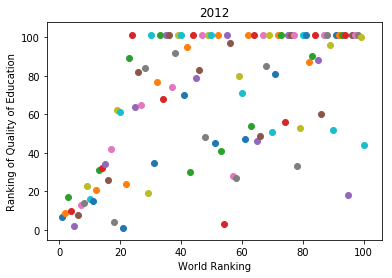

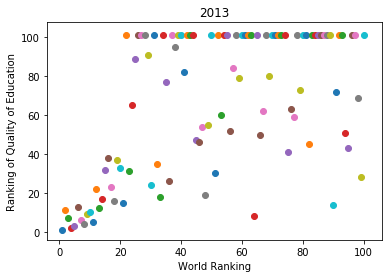

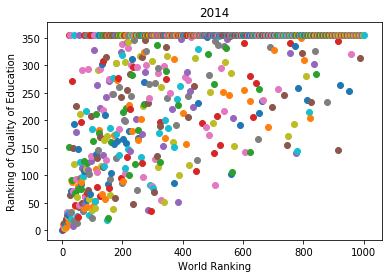

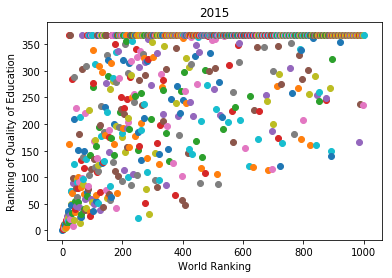

In [35]:
for index,world_rank in df.world_rank.iteritems():
    if df.year[index]==2012:
        plt.scatter(world_rank,df.quality_of_education[index])
plt.xlabel('World Ranking')
plt.ylabel('Ranking of Quality of Education')
plt.title('2012')
plt.show()
    
for index,world_rank in df.world_rank.iteritems():
    if df.year[index]==2013:
        plt.scatter(world_rank,df.quality_of_education[index])
plt.xlabel('World Ranking')
plt.ylabel('Ranking of Quality of Education')
plt.title('2013')
plt.show()

for index,world_rank in df.world_rank.iteritems():
    if df.year[index]==2014:
        plt.scatter(world_rank,df.quality_of_education[index])
plt.xlabel('World Ranking')
plt.ylabel('Ranking of Quality of Education')
plt.title('2014')
plt.show()

for index,world_rank in df.world_rank.iteritems():
    if df.year[index]==2015:
        plt.scatter(world_rank,df.quality_of_education[index])
plt.xlabel('World Ranking')
plt.ylabel('Ranking of Quality of Education')
plt.title('2015')
plt.show()

In [5]:
#From the above graphs we can infer the following about World Rank Vs Quality of education
    #- World rank and quality of education are not directly related i.e a higher ranked University does not mean better quality of education.
    #    Because if it were so then we had to have seen a straight plot or a very high correlation
    #- We can also observe a change over the years that shows that the quality of education has been declining over the years.
    #- As the years have passed by, the better ranking universities are getting a quality of education
    #   rank that looks almost proportional to their world ranking.
    #- But, quality of education has declined in some of the universities. We can observe that by the change in y axis
    #   from 100 to 350.
    #   Which implies that though the world ranking of these universities are within a 100, their quality of education rank
    #   is not within 100. Thus quality of education is not the only factor that decides the world ranking.

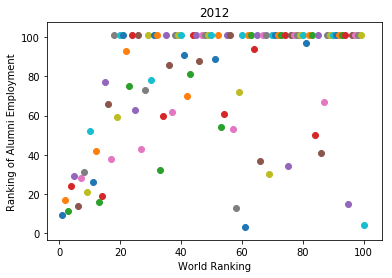

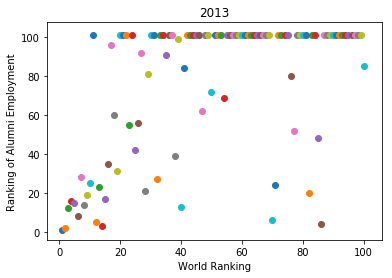

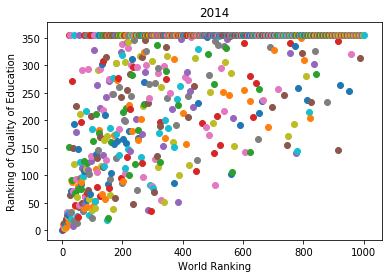

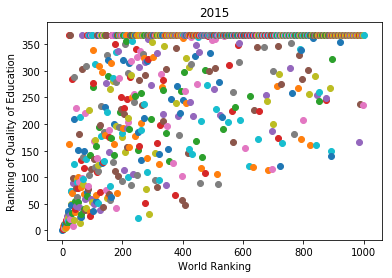

In [23]:
for index,world_rank in df.world_rank.iteritems():
    if df.year[index]==2012:
        plt.scatter(world_rank,df.alumni_employment[index])
plt.xlabel('World Ranking')
plt.ylabel('Ranking of Alumni Employment')
plt.title('2012')
plt.show()
    
for index,world_rank in df.world_rank.iteritems():
    if df.year[index]==2013:
        plt.scatter(world_rank,df.alumni_employment[index])
plt.xlabel('World Ranking')
plt.ylabel('Ranking of Alumni Employment')
plt.title('2013')
plt.show()

for index,world_rank in df.world_rank.iteritems():
    if df.year[index]==2014:
        plt.scatter(world_rank,df.quality_of_education[index])
plt.xlabel('World Ranking')
plt.ylabel('Ranking of Quality of Education')
plt.title('2014')
plt.show()
   
for index,world_rank in df.world_rank.iteritems():
    if df.year[index]==2015:
        plt.scatter(world_rank,df.quality_of_education[index])
plt.xlabel('World Ranking')
plt.ylabel('Ranking of Quality of Education')
plt.title('2015')
plt.show()

In [33]:
#We can observe similar characteristics in the Ranking Vs Alumni Employment as well\n",
#- There are certain universities that have a good world ranking but alumni employment ranking shoots up to 500
#- But the top universities definitely do have a very good ranking of alumni employment"

In [40]:
#Finding the average ranking countrywise over the years
d00={}
for index,country in df.country.iteritems():
    if df.year[index]==2012:
        if country not in d00:
            d00[country]=df.world_rank[index]
        else:
            d00[country]=d00[country]+df.world_rank[index]
for x in d00:
    d00[x]=d00[x]/d0[x]
#d00 is a dictionary containing the average university ranking for a country in the year 2012
d11={}
for index,country in df.country.iteritems():
    if df.year[index]==2013:
        if country not in d11:
            d11[country]=df.world_rank[index]
        else:
            d11[country]=d11[country]+df.world_rank[index]
for x in d11:
    d11[x]=d11[x]/d1[x]
#d11 is a dictionary containing the average university ranking for a country in the year 2013
d22={}
for index,country in df.country.iteritems():
    if df.year[index]==2014:
        if country not in d22:
            d22[country]=df.world_rank[index]
        else:
            d22[country]=d22[country]+df.world_rank[index]

for x in d22:
    d22[x]=d22[x]/d2[x]
#d22 is a dictionary containing the average university ranking for a country in the year 2014

d33={}
for index,country in df.country.iteritems():
    if df.year[index]==2015:
        if country not in d33:
            d33[country]=df.world_rank[index]
        else:
            d33[country]=d33[country]+df.world_rank[index]
for x in d33:
    d33[x]=d33[x]/d3[x]
#d33 is a dictionary containing the average university ranking for a country in the year 2015

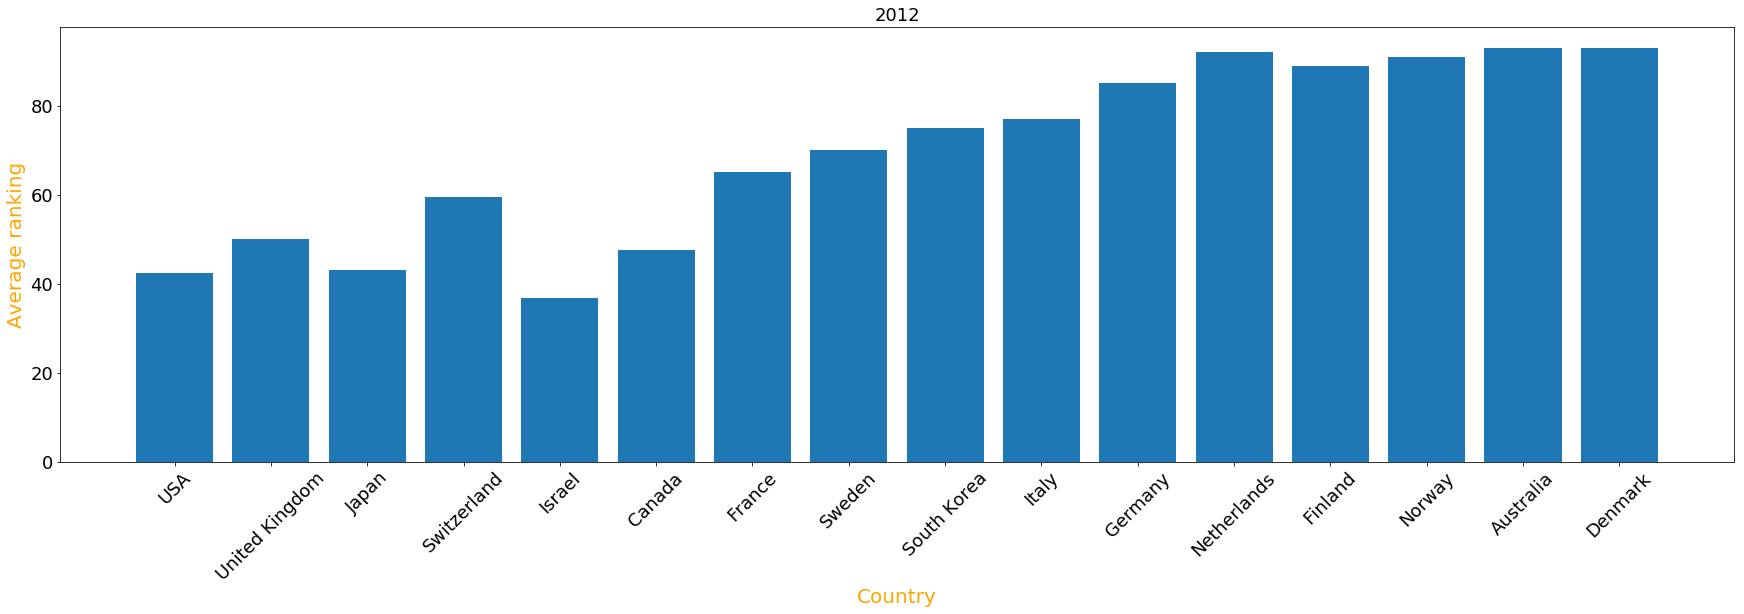

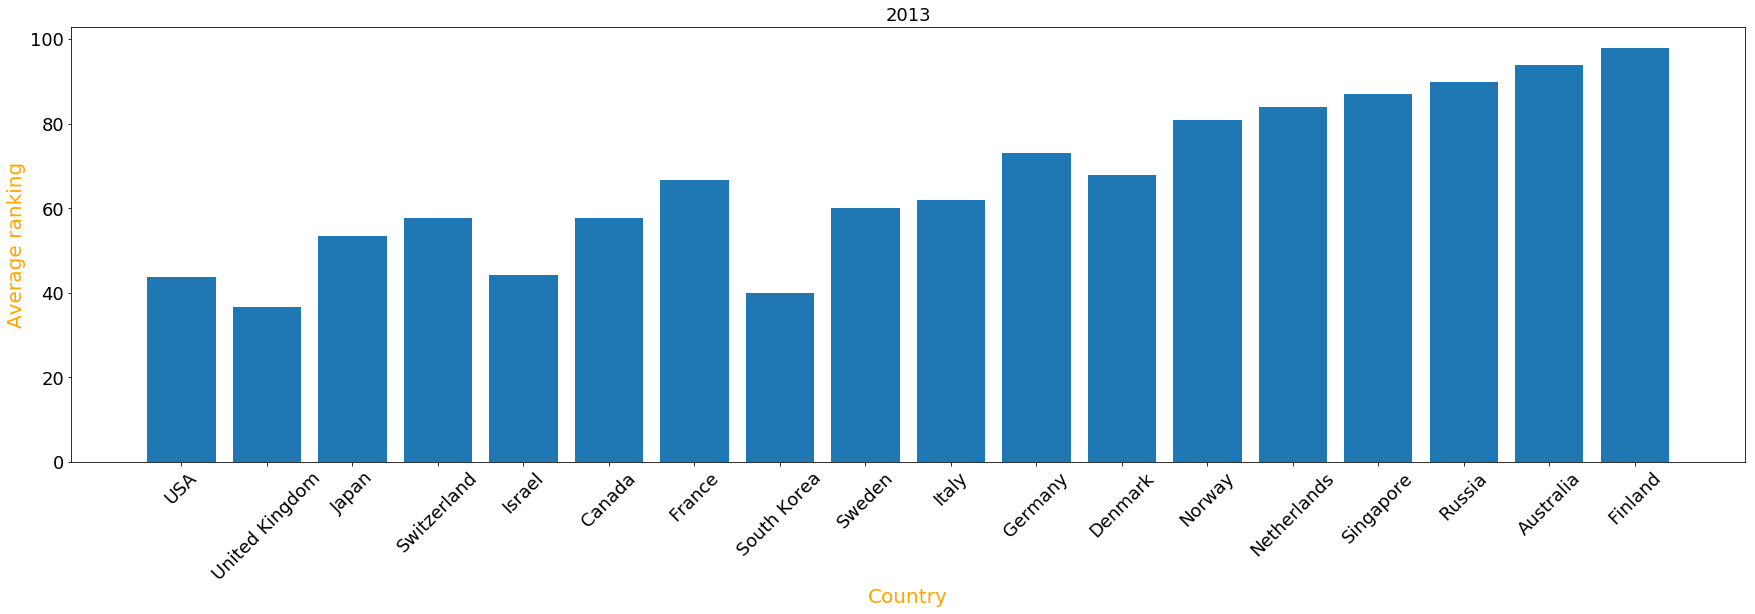

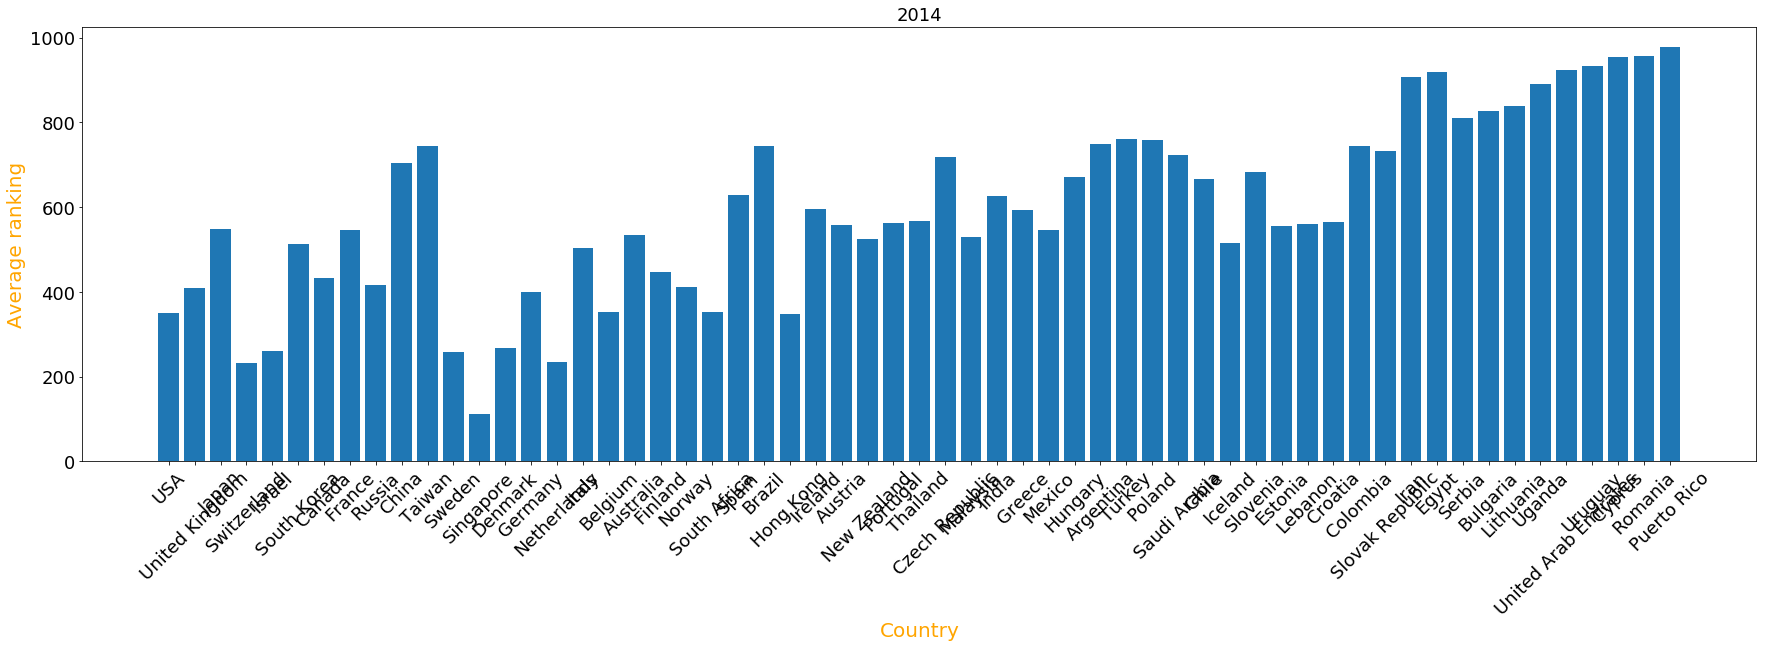

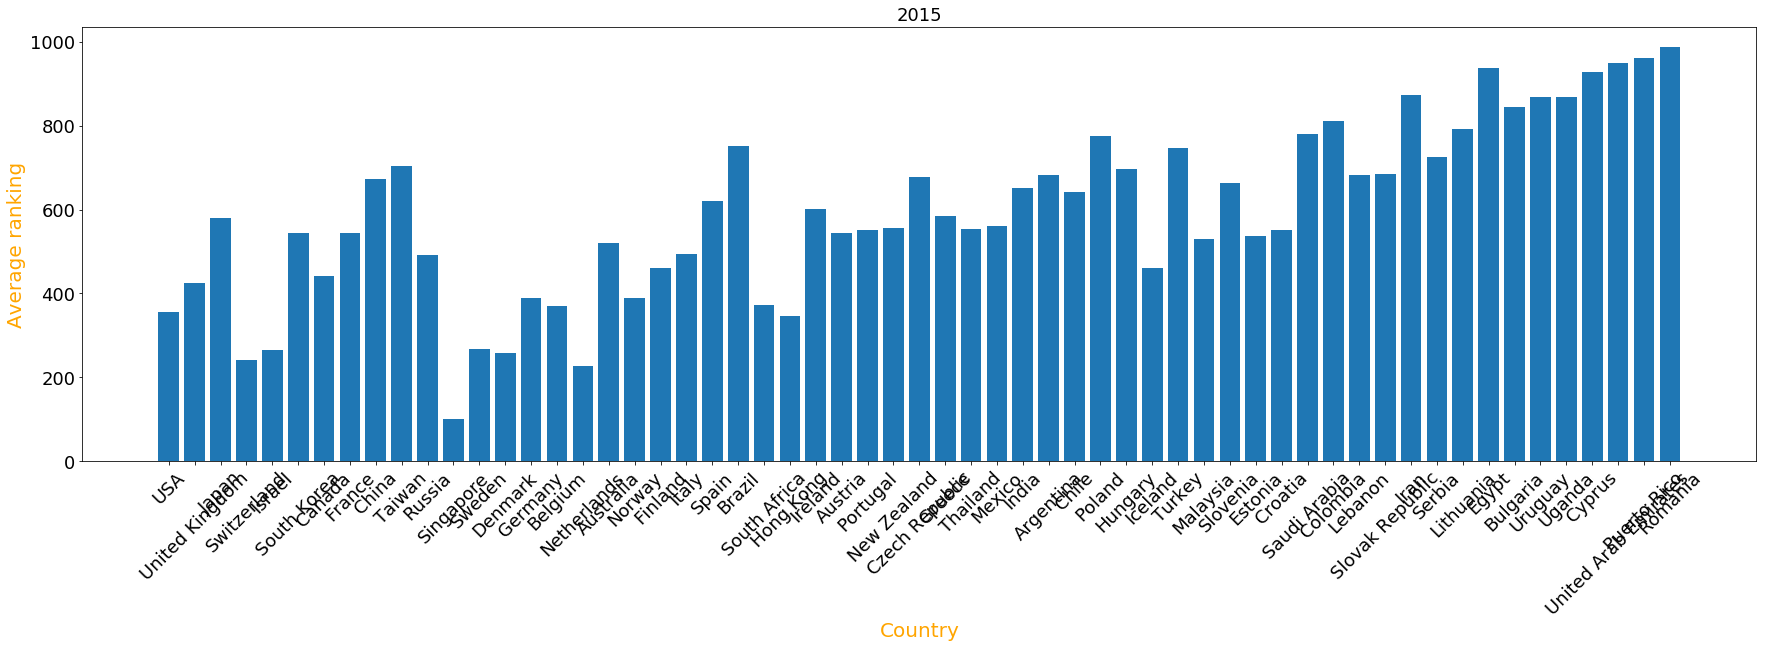

In [45]:
country2012=list(d00.keys())
avg_rank2012=list(d00.values())
plt.subplots(figsize=(30,8))
y_pos=np.arange(len(country2012))
plt.bar(y_pos,avg_rank2012)
plt.xticks(y_pos, country2012,rotation=45,fontsize='18')
plt.yticks(fontsize='18')
plt.title("2012",fontsize='18')
plt.xlabel("Country",fontsize='20',color='orange')
plt.ylabel("Average ranking",fontsize='20',color='orange')
plt.show()
    
country2013=list(d11.keys())
avg_rank2013=list(d11.values())
plt.subplots(figsize=(30,8))
y_pos=np.arange(len(country2013))
plt.bar(y_pos,avg_rank2013)
plt.xticks(y_pos,country2013,rotation=45,fontsize='18')
plt.yticks(fontsize='18')
plt.title("2013",fontsize='18')
plt.xlabel("Country",fontsize='20',color='orange')
plt.ylabel("Average ranking",fontsize='20',color='orange')
plt.show()
   
country2014=list(d22.keys())
avg_rank2014=list(d22.values())
plt.subplots(figsize=(30,8))
y_pos=np.arange(len(country2014))
plt.bar(y_pos,avg_rank2014)
plt.xticks(y_pos,country2014,rotation=45,fontsize='18')
plt.yticks(fontsize='18')
plt.title("2014",fontsize='18')
plt.xlabel("Country",fontsize='20',color='orange')
plt.ylabel("Average ranking",fontsize='20',color='orange')
plt.show()
    
country2015=list(d33.keys())
avg_rank2015=list(d33.values())
plt.subplots(figsize=(30,8))
y_pos=np.arange(len(country2015))
plt.bar(y_pos,avg_rank2015)
plt.xticks(y_pos,country2015,rotation=45,fontsize='18')
plt.yticks(fontsize='18')
plt.title("2015",fontsize='18')
plt.xlabel("Country",fontsize='20',color='orange')
plt.ylabel("Average ranking",fontsize='20',color='orange')
plt.show()
  #following is the average ranking countrywise
  

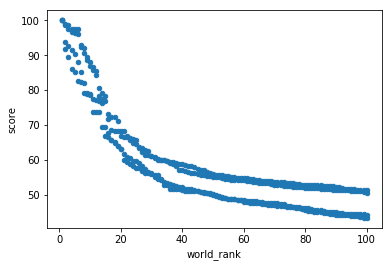

In [39]:
#The below graph shows how the ranking and the score varies, the better the rank the better the score.
df.plot(kind = "scatter",x="world_rank",y = "score")
plt.show()

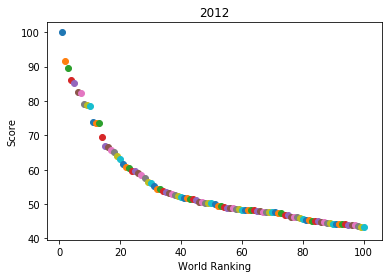

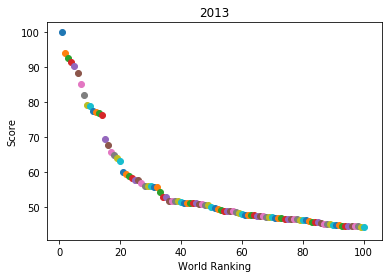

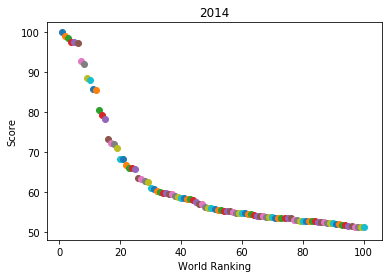

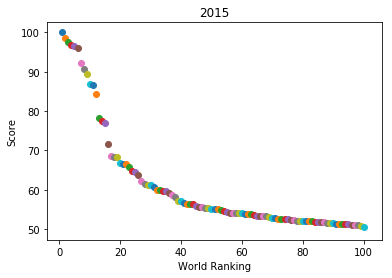

In [65]:
for index,world_rank in df.world_rank.iteritems():
    if df.year[index]==2012:
        plt.scatter(world_rank,df.score[index])
plt.xlabel('World Ranking')
plt.ylabel('Score')
plt.title('2012')
plt.show()
    
for index,world_rank in df.world_rank.iteritems():
    if df.year[index]==2013:
        plt.scatter(world_rank,df.score[index])
plt.xlabel('World Ranking')
plt.ylabel('Score')
plt.title('2013')
plt.show()
    
for index,world_rank in df.world_rank.iteritems():
    if df.year[index]==2014:
        plt.scatter(world_rank,df.score[index])
plt.xlabel('World Ranking')
plt.ylabel('Score')
plt.title('2014')
plt.show()
  
for index,world_rank in df.world_rank.iteritems():
    if df.year[index]==2015:
        plt.scatter(world_rank,df.score[index])
plt.xlabel('World Ranking')
plt.ylabel('Score')
plt.title('2015')
plt.show()
   
   

In [43]:
#The above graphs gives us a very good look into how ranking vs score varies
#- The graphs shows that a better ranked university implies a better score
#- Thus, though not all factors are the highest for the best university on a whole when all the factors are taken\
#  The better the university, the better the overall score.
   
#Hence, we can conclude saying the most influential veriable is the score.
#Also, over the years we observe that the US has almost but not all of the best universities.
#Knowledge gained from other researches and articles contribute it to the following factors:
#Quality of faculty
#Investment in Research and Development
#American schools tend to be more holistic in their evaluation of applicants, both in admissions and in evaluation
    
#We'd also like to bring to notice that, though most of the top 100 unis are from the US
#It does not guarantee that the other universities are not comparable. It is just a trend and with time
#we are sure the other developing countries like our own will catch up."

[58, 57, 53, 55]
[8, 7, 7, 7]
[5, 6, 8, 7]


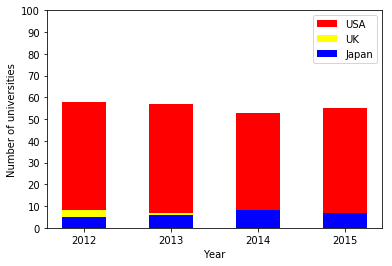

In [3]:
#Comparision between the countries having the most number of universities in the top 100
#USA, UK and Japan
#import pandas as pd
#df=pd.read_csv('unirank.csv')

#usa=[58,57,53,55]
#uk=[8,7,7,7]
#japan=[5,6,8,7]

N=4
usa12=[]
uk12=[]
japan12=[]

usa13=[]
uk13=[]
japan13=[]

usa14=[]
uk14=[]
japan14=[]

usa15=[]
uk15=[]
japan15=[]

usa=[]
uk=[]
japan=[]



for index,country in df.country.iteritems():
    if df.year[index]==2012:
        if country=="USA":
            usa12.append(df.institution[index])
        elif country=="United Kingdom":
            uk12.append(df.institution[index])
        elif country=="Japan":
            japan12.append(df.institution[index])

for index,country in df.country.iteritems():
    if df.year[index]==2013:
        if country=="USA":
            usa13.append(df.institution[index])
        elif country=="United Kingdom":
            uk13.append(df.institution[index])
        elif country=="Japan":
            japan13.append(df.institution[index])

for index,country in df.country.iteritems():
    if df.year[index]==2014:
        if country=="USA":
            if df.world_rank[index]<=100:
                usa14.append(df.institution[index])
        elif country=="United Kingdom":
            if df.world_rank[index]<=100:
                uk14.append(df.institution[index])
        elif country=="Japan":
            if df.world_rank[index]<=100:
                japan14.append(df.institution[index])

for index,country in df.country.iteritems():
    if df.year[index]==2015:
        if country=="USA":
            if df.world_rank[index]<=100:
                usa15.append(df.institution[index])
        elif country=="United Kingdom":
            if df.world_rank[index]<=100:
                uk15.append(df.institution[index])
        elif country=="Japan":
            if df.world_rank[index]<=100:
                japan15.append(df.institution[index])

usa.append(len(usa12))
usa.append(len(usa13))
usa.append(len(usa14))
usa.append(len(usa15))

uk.append(len(uk12))
uk.append(len(uk13))
uk.append(len(uk14))
uk.append(len(uk15))

japan.append(len(japan12))
japan.append(len(japan13))
japan.append(len(japan14))
japan.append(len(japan15))


print(usa)
print(uk)
print(japan)

i=np.arange(N)
width=0.5

p1=plt.bar(i, usa, width, color='red')
p2=plt.bar(i,uk,width,color='yellow')
p3=plt.bar(i,japan,width,color='blue')

plt.xlabel('Year')
plt.ylabel('Number of universities')
plt.xticks(i, ('2012', '2013', '2014', '2015'))
plt.yticks(np.arange(0, 101, 10))
plt.legend((p1[0], p2[0],p3[0]), ('USA', 'UK','Japan'))

plt.show()


#in 2013 and 2014, the values of UK and Japan are almost equal,and hence the stacks overlap.
#this is why the bar for UK isn't seen




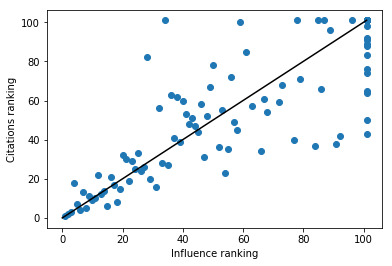

In [24]:
#Does the ranking of citation and ranking of influence have a relation?
#We observe that they are more or less linear this could be because :
#- Citations refers to the mention of the institution either in a research paper, news, journal etc
#- Thus higher the rank of citation, the more that institution has been mentioned 
#  and the more influence it has on developments and recognition in the society
  
inf=[]
cit=[]
for index,year in df.year.iteritems():
    if year==2013:
        inf.append(df.influence[index])
        cit.append(df.citations[index])
plt.scatter(inf,cit)
plt.plot([0,101],[0,101],color="black")
plt.xlabel('Influence ranking')
plt.ylabel('Citations ranking')
plt.show()

[208.79999999999998, 28.8, 18.0, 104.39999999999999]


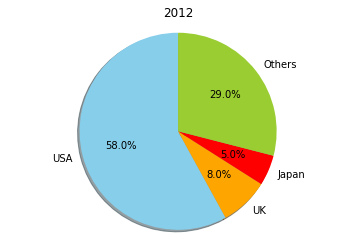

[205.2, 25.200000000000003, 21.599999999999998, 108.0]


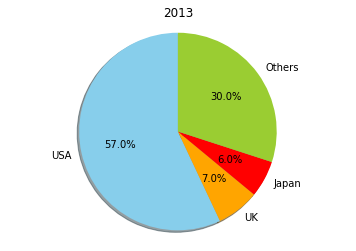

[190.8, 25.200000000000003, 28.8, 115.2]


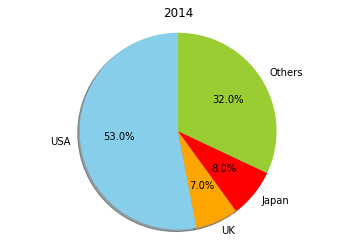

[198.00000000000003, 25.200000000000003, 25.200000000000003, 111.6]


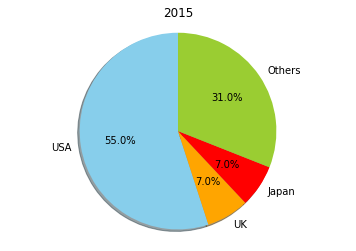

In [24]:

labels = 'USA', 'UK', 'Japan','Others'
colors = [ 'skyblue', 'orange', 'red','yellowgreen']

 
#autopct is the number of decimal places the percentage values should have
#startangle is the angle from which the first slice should start
#the angles[] contain the values of the angles the slices cut at the centre.
#these were obtained from the percentage of universities that each of the countries have in the top 100
#angles12 = [208.8, 28.8, 18]
angles12=[]
others12= 100-(len(usa12)+len(uk12)+len(japan12))

angles12.append((len(usa12)/100)*360)
angles12.append((len(uk12)/100)*360)
angles12.append((len(japan12)/100)*360)
angles12.append((others12/100)*360)

print(angles12)
plt.pie(angles12,labels=labels,colors=colors,autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('2012')
plt.axis('equal')
plt.show()


#angles13 = [205.2, 25.2, 21.6]
angles13=[]
others13= 100-(len(usa13)+len(uk13)+len(japan13))
angles13.append((len(usa13)/100)*360)
angles13.append((len(uk13)/100)*360)
angles13.append((len(japan13)/100)*360)
angles13.append((others13/100)*360)

print(angles13)
plt.pie(angles13,labels=labels,colors=colors,autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('2013')
plt.axis('equal')
plt.show()

#angles14 = [190.8, 25.2, 28.8]
angles14=[]
others14=100-(len(usa14)+len(uk14)+len(japan14))

angles14.append((len(usa14)/100)*360)
angles14.append((len(uk14)/100)*360)
angles14.append((len(japan14)/100)*360)
angles14.append((others14/100)*360)

print(angles14)
plt.pie(angles14,labels=labels,colors=colors,autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('2014')
plt.axis('equal')
plt.show()

#angles15 = [198, 25.2, 25.2]
angles15=[]
others15=100-(len(usa15)+len(uk15)+len(japan15))

angles15.append((len(usa15)/100)*360)
angles15.append((len(uk15)/100)*360)
angles15.append((len(japan15)/100)*360)
angles15.append((others15/100)*360)

print(angles15)
plt.pie(angles15,labels=labels,colors=colors,autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('2015')
plt.axis('equal')
plt.show()



In [4]:
instdict={}
for index,inst in df.institution.iteritems():
    if df.world_rank[index]<=10:
        if inst not in instdict:
            instdict[inst]={}
            
        instdict[inst][df.year[index]]=df.world_rank[index]
print(instdict)

{'Harvard University': {2012: 1, 2013: 1, 2014: 1, 2015: 1}, 'Massachusetts Institute of Technology': {2012: 2, 2013: 4, 2014: 3, 2015: 3}, 'Stanford University': {2012: 3, 2013: 2, 2014: 2, 2015: 2}, 'University of Cambridge': {2012: 4, 2013: 5, 2014: 4, 2015: 4}, 'California Institute of Technology': {2012: 5}, 'Princeton University': {2012: 6, 2013: 8, 2014: 9, 2015: 9}, 'University of Oxford': {2012: 7, 2013: 3, 2014: 5, 2015: 5}, 'Yale University': {2012: 8, 2013: 10, 2014: 10}, 'Columbia University': {2012: 9, 2013: 6, 2014: 6, 2015: 6}, 'University of California, Berkeley': {2012: 10, 2013: 7, 2014: 7, 2015: 7}, 'University of Chicago': {2013: 9, 2014: 8, 2015: 8}, 'Cornell University': {2015: 10}}
